# Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use **only** your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

## Imports:

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

import warnings
warnings.filterwarnings("ignore")

## 1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
train.head()

,bed_count,bath_count,area,property_value,year_built,tax_amount,county
993671,4,3.0,1956,293741,1955,3554.38,Orange
1191413,3,2.0,1929,438685,1929,5486.56,Los Angeles
1131915,3,2.0,1188,61191,1952,1073.84,Orange
1998279,2,1.0,1133,44967,1950,847.60,Orange
1417050,4,4.0,3033,423764,2011,5534.04,Los Angeles


In [4]:
def plot_variable_pairs(df):
    sns.pairplot(df.sample(10_000),corner=True,kind='reg', plot_kws={'line_kws':{'color':'red'}})

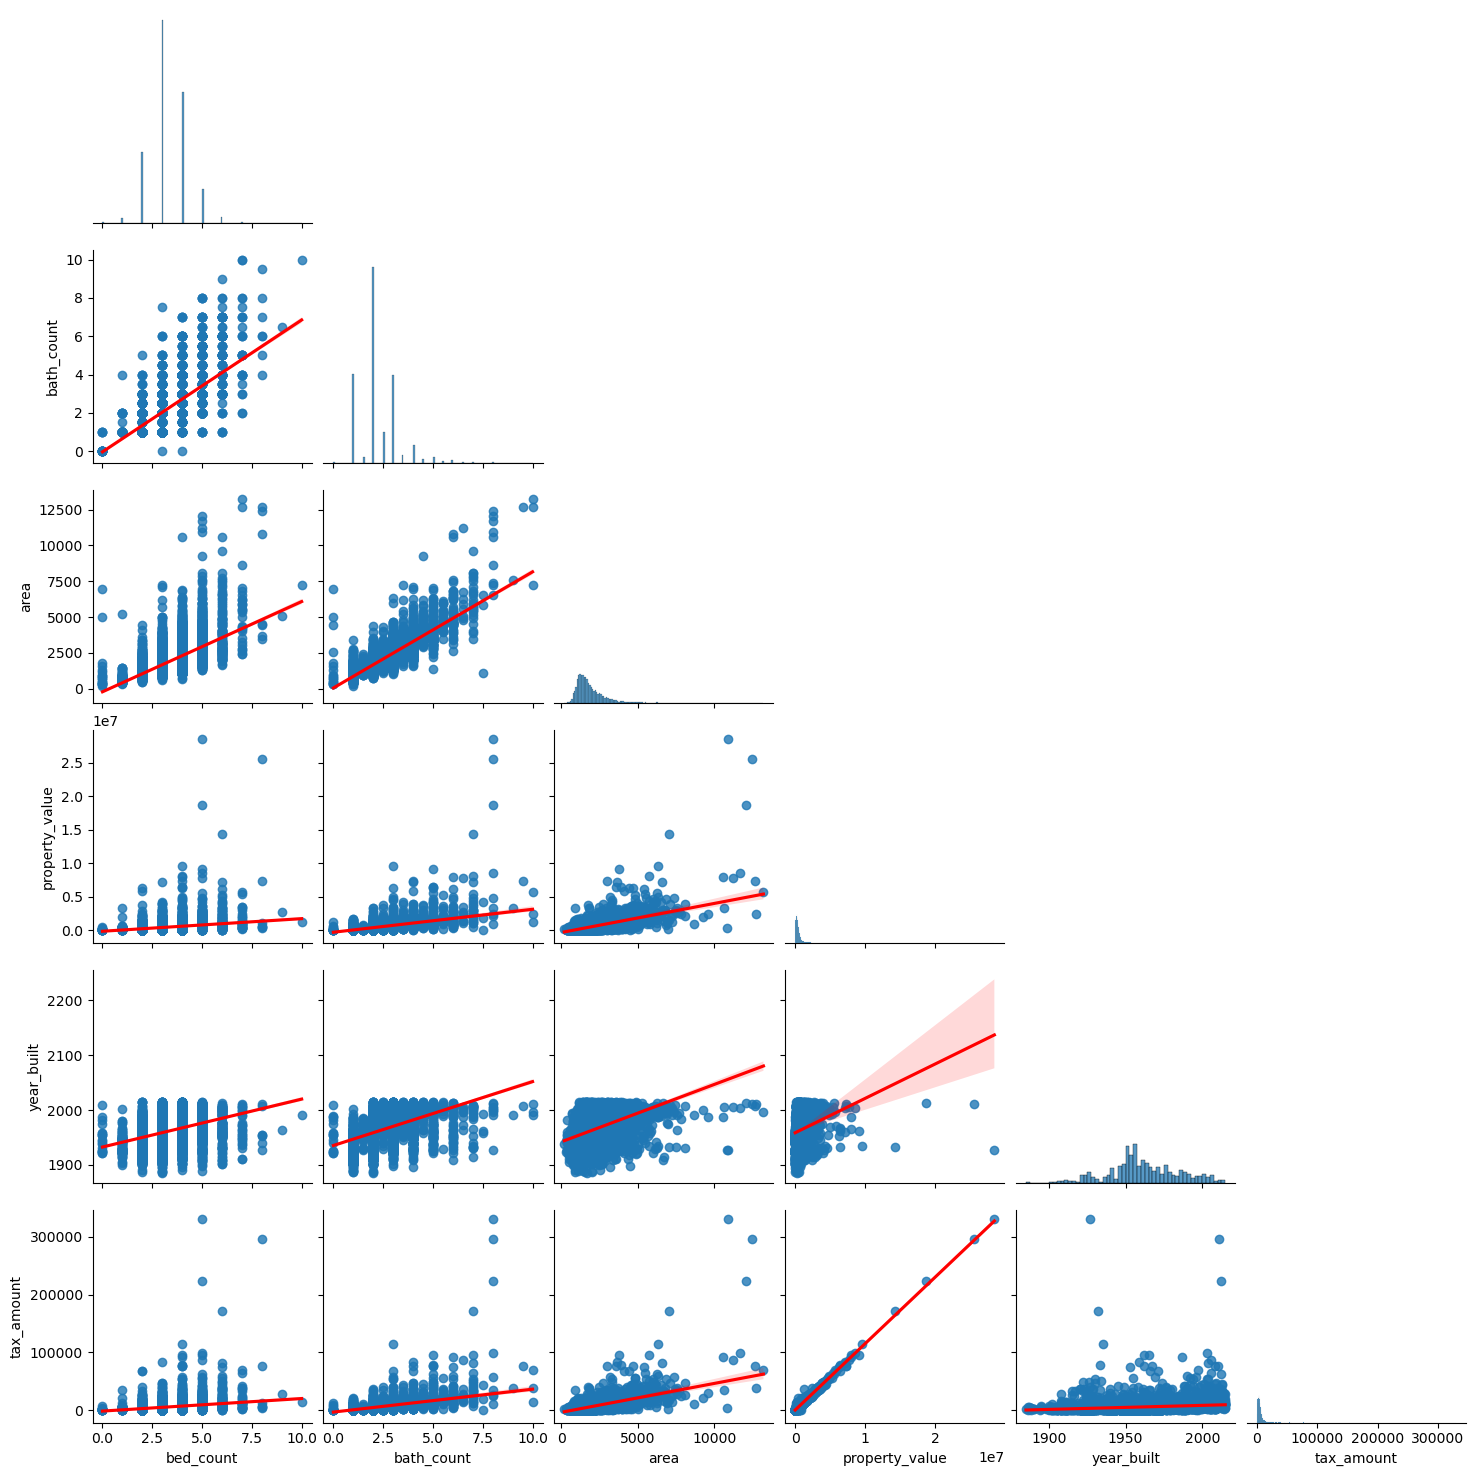

In [5]:
plot_variable_pairs(train)

## 2. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [6]:
for col in train.columns:
    print(f'{col}: {train[col].nunique()}')

bed_count: 19
bath_count: 36
area: 9526
property_value: 445974
year_built: 148
tax_amount: 708134
county: 3


In [7]:
cat_columns = []
cont_columns = []

for col in train.columns:
    if train[col].nunique() < 10:
        cat_columns.append(col)
    else:
        cont_columns.append(col)
        
print(cat_columns)
print(cont_columns)

['county']
['bed_count', 'bath_count', 'area', 'property_value', 'year_built', 'tax_amount']


In [8]:
cat_columns

['county']

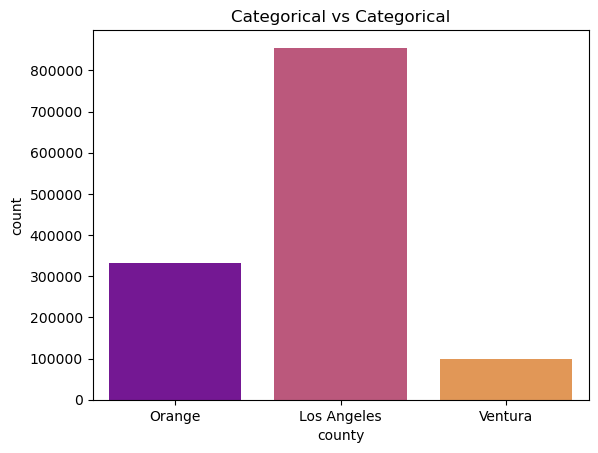

In [9]:
order = train.county.unique()

for col in cat_columns:
    sns.countplot(data=train,x=train[col],order=order,palette='plasma')
    plt.title('Categorical vs Categorical')
    plt.show()

* $H_0$: The distributions are normal
* $H_a$: The distributions are not normally distributed

In [10]:
is_normal_dist = 0
not_normal_dist = 0
α = .05
for col in cont_columns:
    t,p = stats.shapiro(train[col])
    if p < α:
        not_normal_dist+=1
    else:
        is_normal_dist+=1
print('Normally Distibuted?')
print(f'\tYes:\t{is_normal_dist}')
print(f'\tNo:\t{not_normal_dist}')

Normally Distibuted?
	Yes:	0
	No:	6


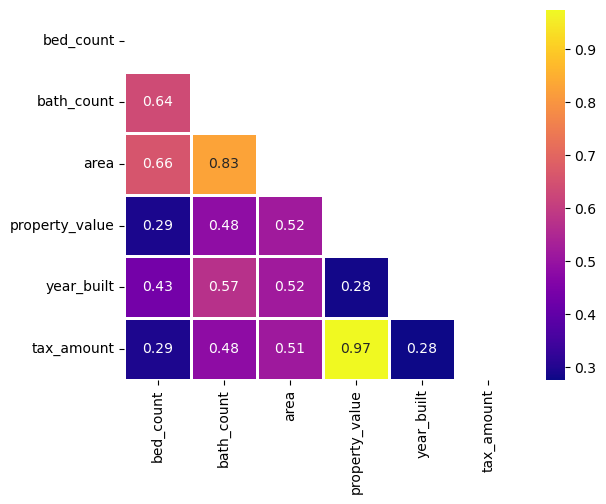

In [11]:
heatmap_data = train[cont_columns].sample(10_000, random_state=913)
data = heatmap_data.corr(method='spearman')

kwargs = {
    'linewidth': 1, 
    'linestyle': '-',
    'cmap': 'plasma',
    'annot': True,
    'mask': np.triu(data)
}

sns.heatmap(data=data, **kwargs)
plt.show()

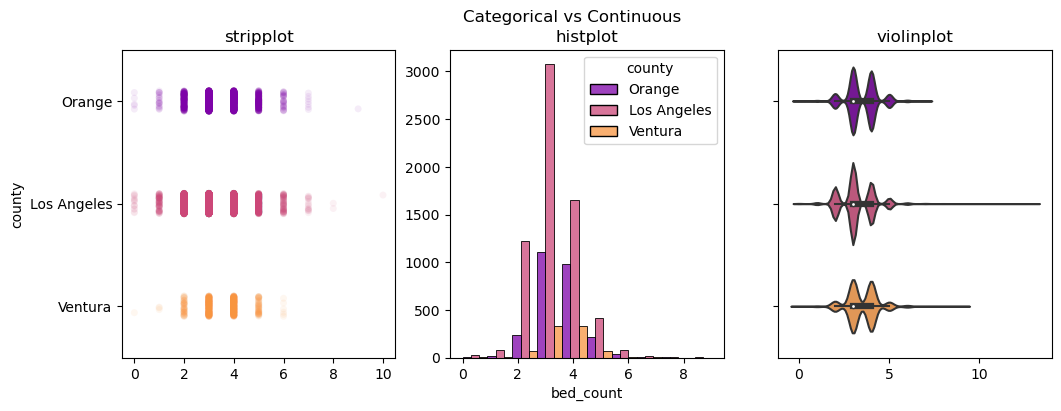

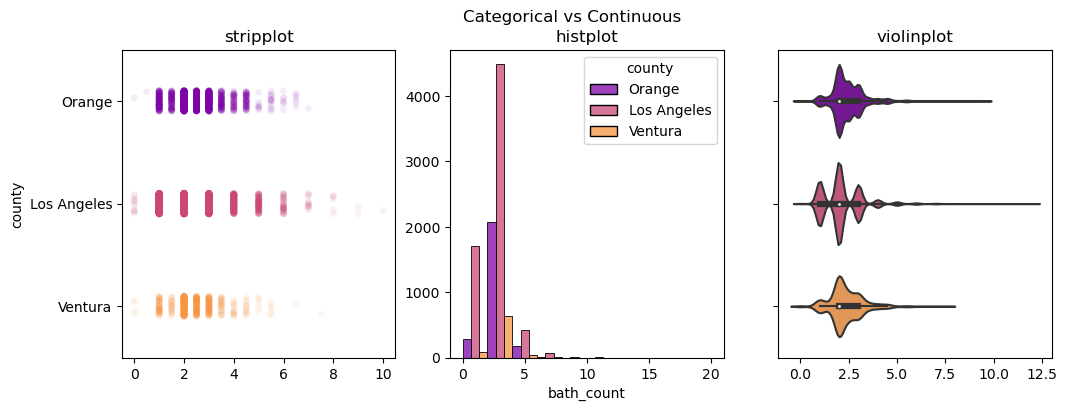

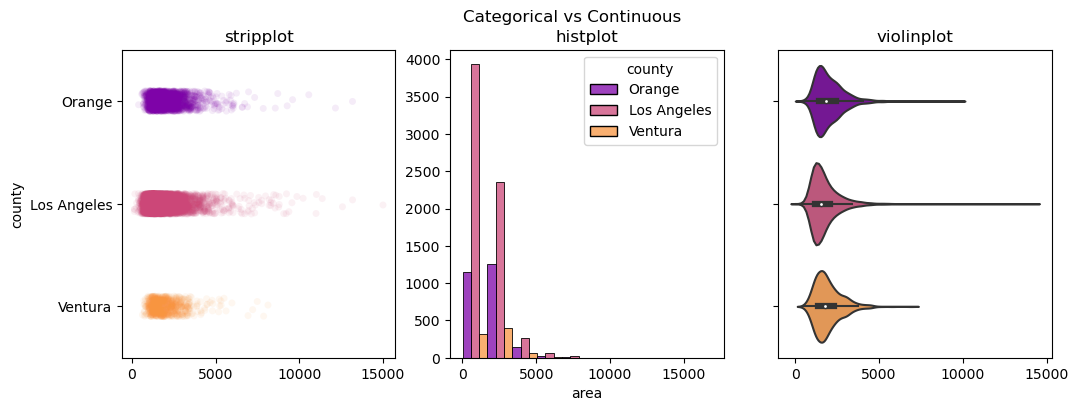

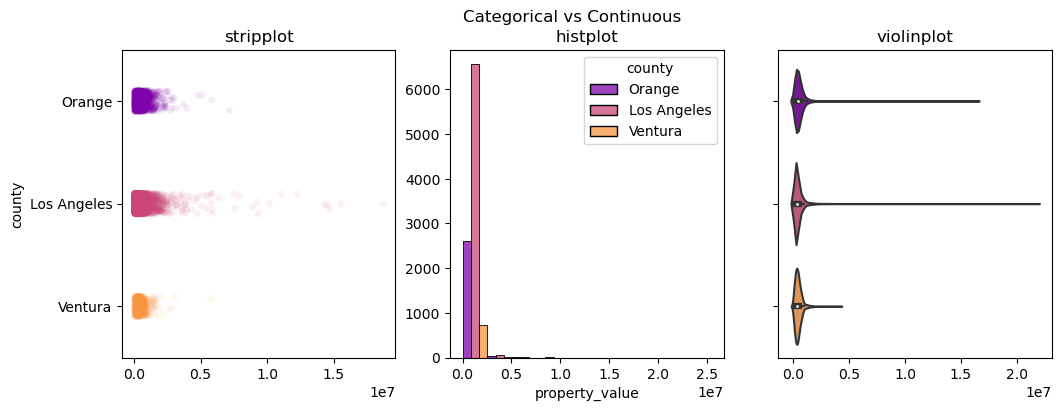

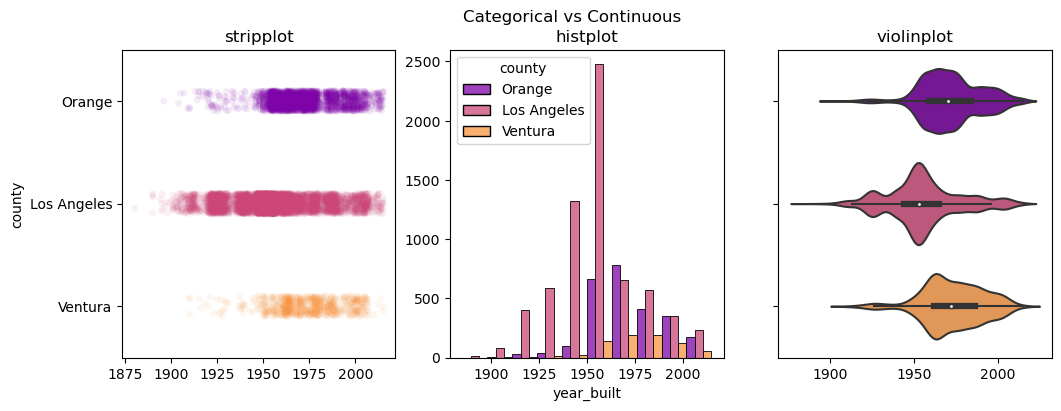

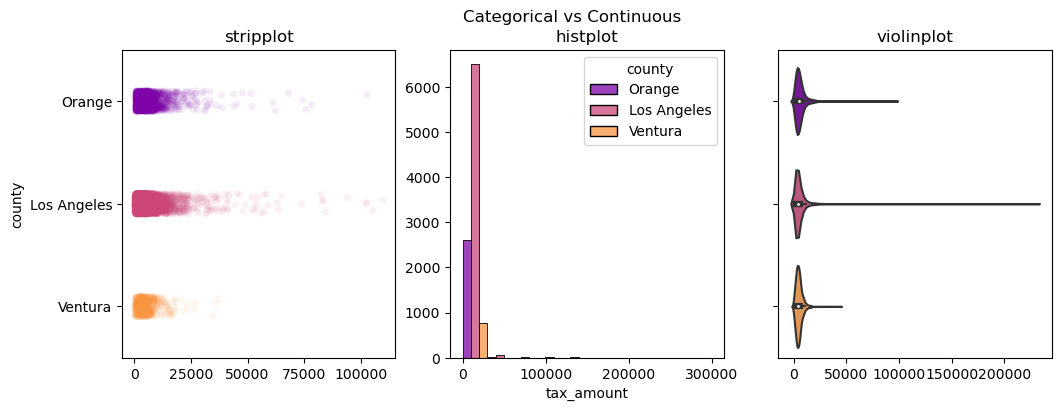

In [12]:
for col in cont_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    plt.suptitle('Categorical vs Continuous')
    
    order = train.county.unique()

    sns.stripplot(x=col, y='county', data=train.sample(10_000), order=order, palette='plasma', ax=ax1,alpha=.075)
    ax1.set(ylabel='county',xlabel='',title='stripplot')
    
    sns.histplot(x=col, data=train.sample(10_000), hue='county',hue_order=order,bins=10,palette='plasma',multiple='dodge', ax=ax2)
    ax2.set(ylabel='',xlabel=col,title='histplot')
    
    sns.violinplot(x=col, y='county', data=train.sample(10_000),order=order, palette='plasma', ax=ax3)
    ax3.set(ylabel='',xlabel='',title='violinplot')
    ax3.set_yticklabels([])

    plt.show()

In [13]:
def plot_categorical_and_continuous_vars(df,cat_columns,cont_columns):
    order = df.county.unique()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    heatmap_data = df[cont_columns].sample(10_000, random_state=913)
    data = heatmap_data.corr(method='spearman')

    kwargs = {
        'linewidth': 1, 
        'linestyle': '-',
        'cmap': 'plasma',
        'annot': True,
        'mask': np.triu(data)}

    sns.heatmap(data=data,ax=ax1, **kwargs)
    ax1.set(title = 'Continuous vs Continuous')
    
    for col in cat_columns:
        sns.countplot(data=df,x=df[col],order=order,palette='plasma',ax=ax2)
    ax2.set(title='Categorical vs Categorical')
    plt.show()

    
    for col in cont_columns:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
        plt.suptitle('Categorical vs Continuous')

        order = df.county.unique()

        sns.stripplot(x=col, y='county', data=df.sample(10_000), order=order, palette='plasma', ax=ax1,alpha=.075)
        ax1.set(ylabel='county',xlabel='',title='stripplot')

        sns.histplot(x=col, data=df.sample(10_000), hue='county',hue_order=order,bins=10,palette='plasma',multiple='dodge', ax=ax2)
        ax2.set(ylabel='',xlabel=col,title='histplot')

        sns.violinplot(x=col, y='county', data=df.sample(10_000),order=order, palette='plasma', ax=ax3)
        ax3.set(ylabel='',xlabel='',title='violinplot')
        ax3.set_yticklabels([])

        plt.show()

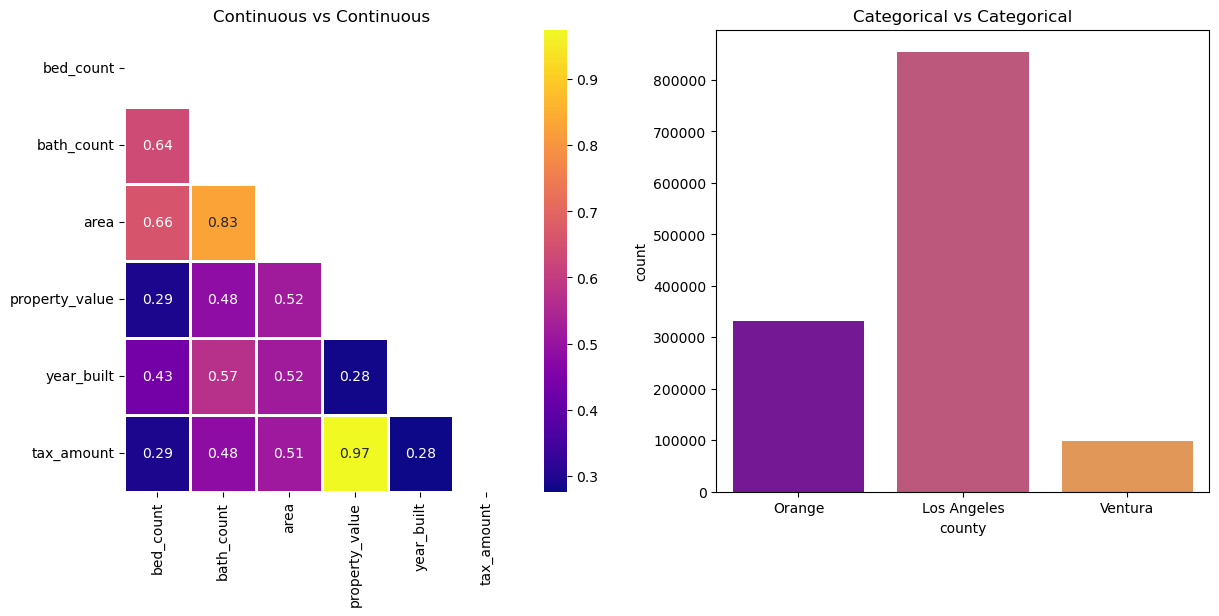

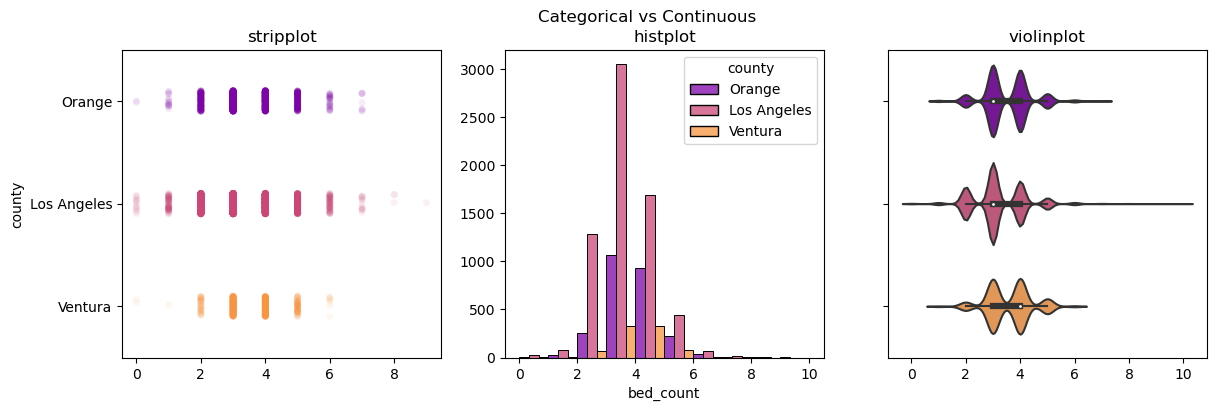

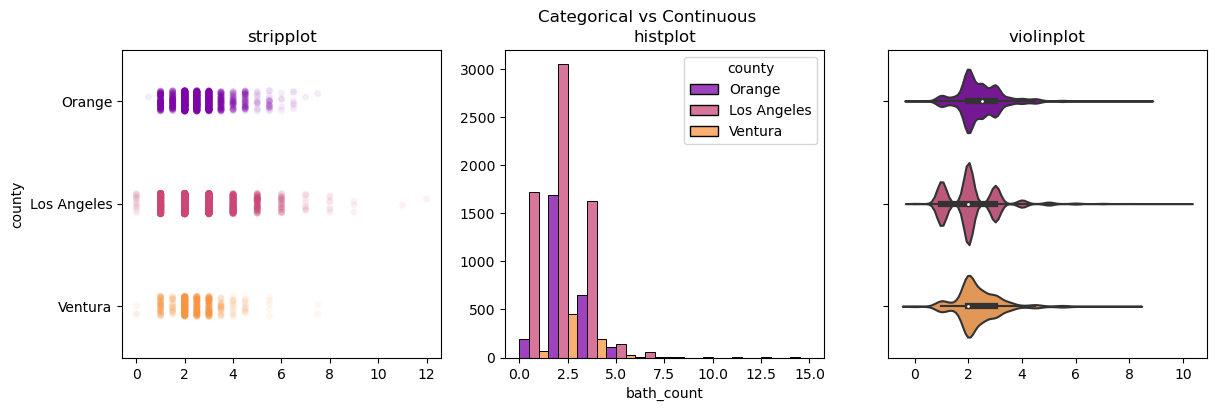

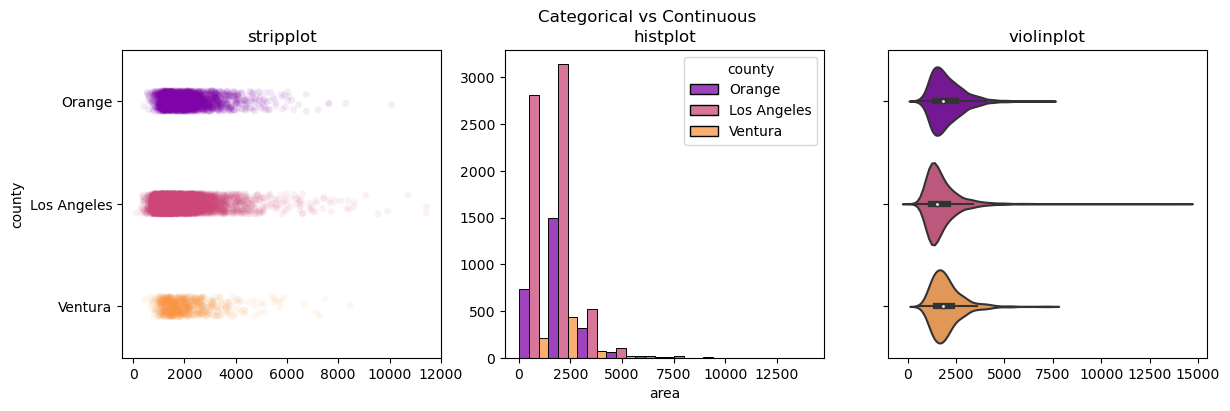

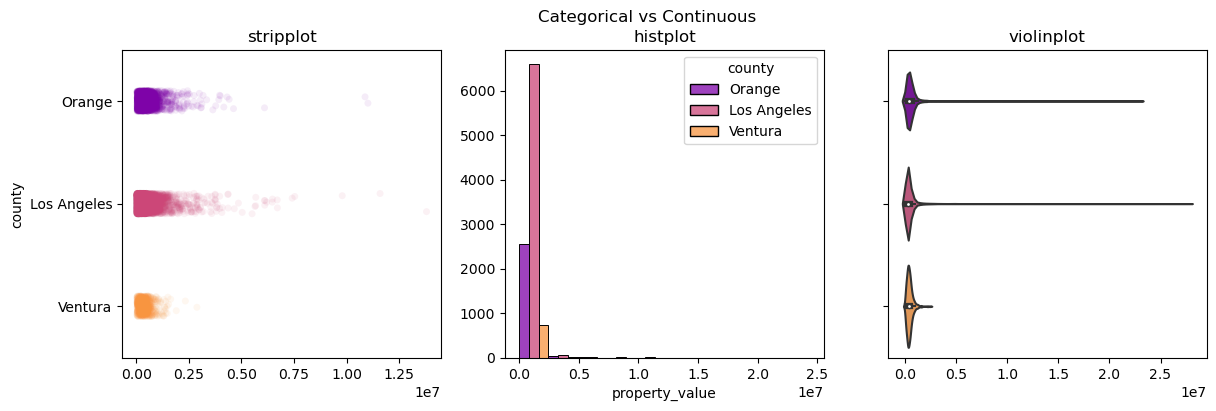

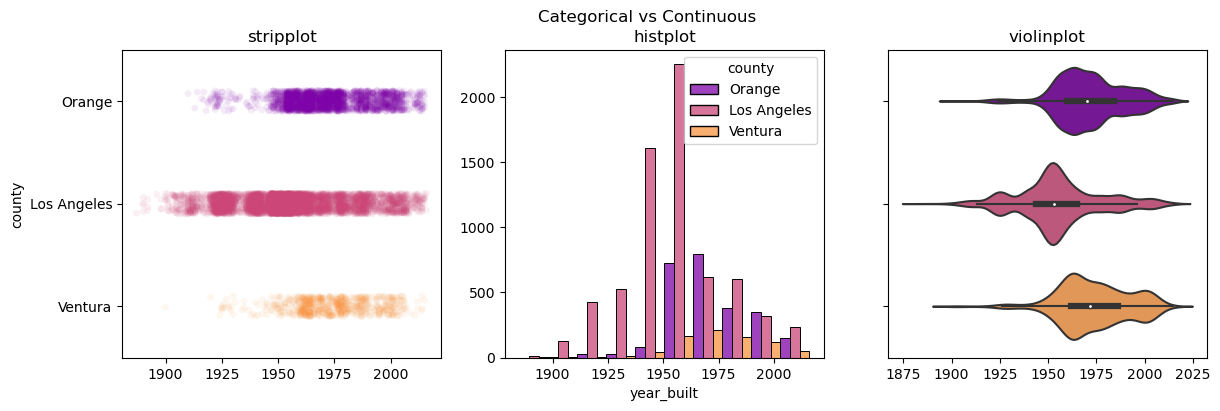

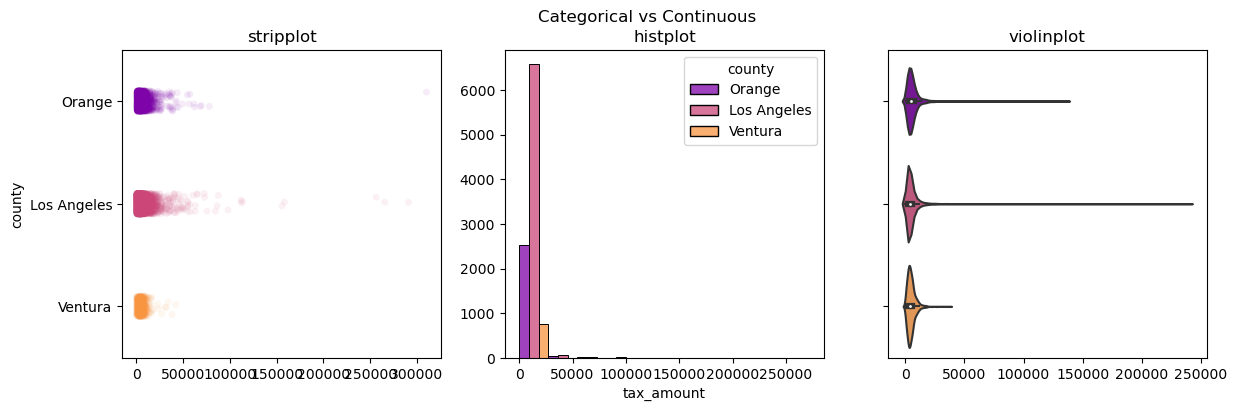

In [14]:
plot_categorical_and_continuous_vars(train,cat_columns,cont_columns)

## 3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [15]:
train, validate, test = w.wrangle_zillow()

In [16]:
cat_columns = []
cont_columns = []

for col in train.columns:
    if train[col].nunique() < 10:
        cat_columns.append(col)
    else:
        cont_columns.append(col)
        
print(cat_columns)
print(cont_columns)

['county']
['bed_count', 'bath_count', 'area', 'property_value', 'year_built', 'tax_amount']


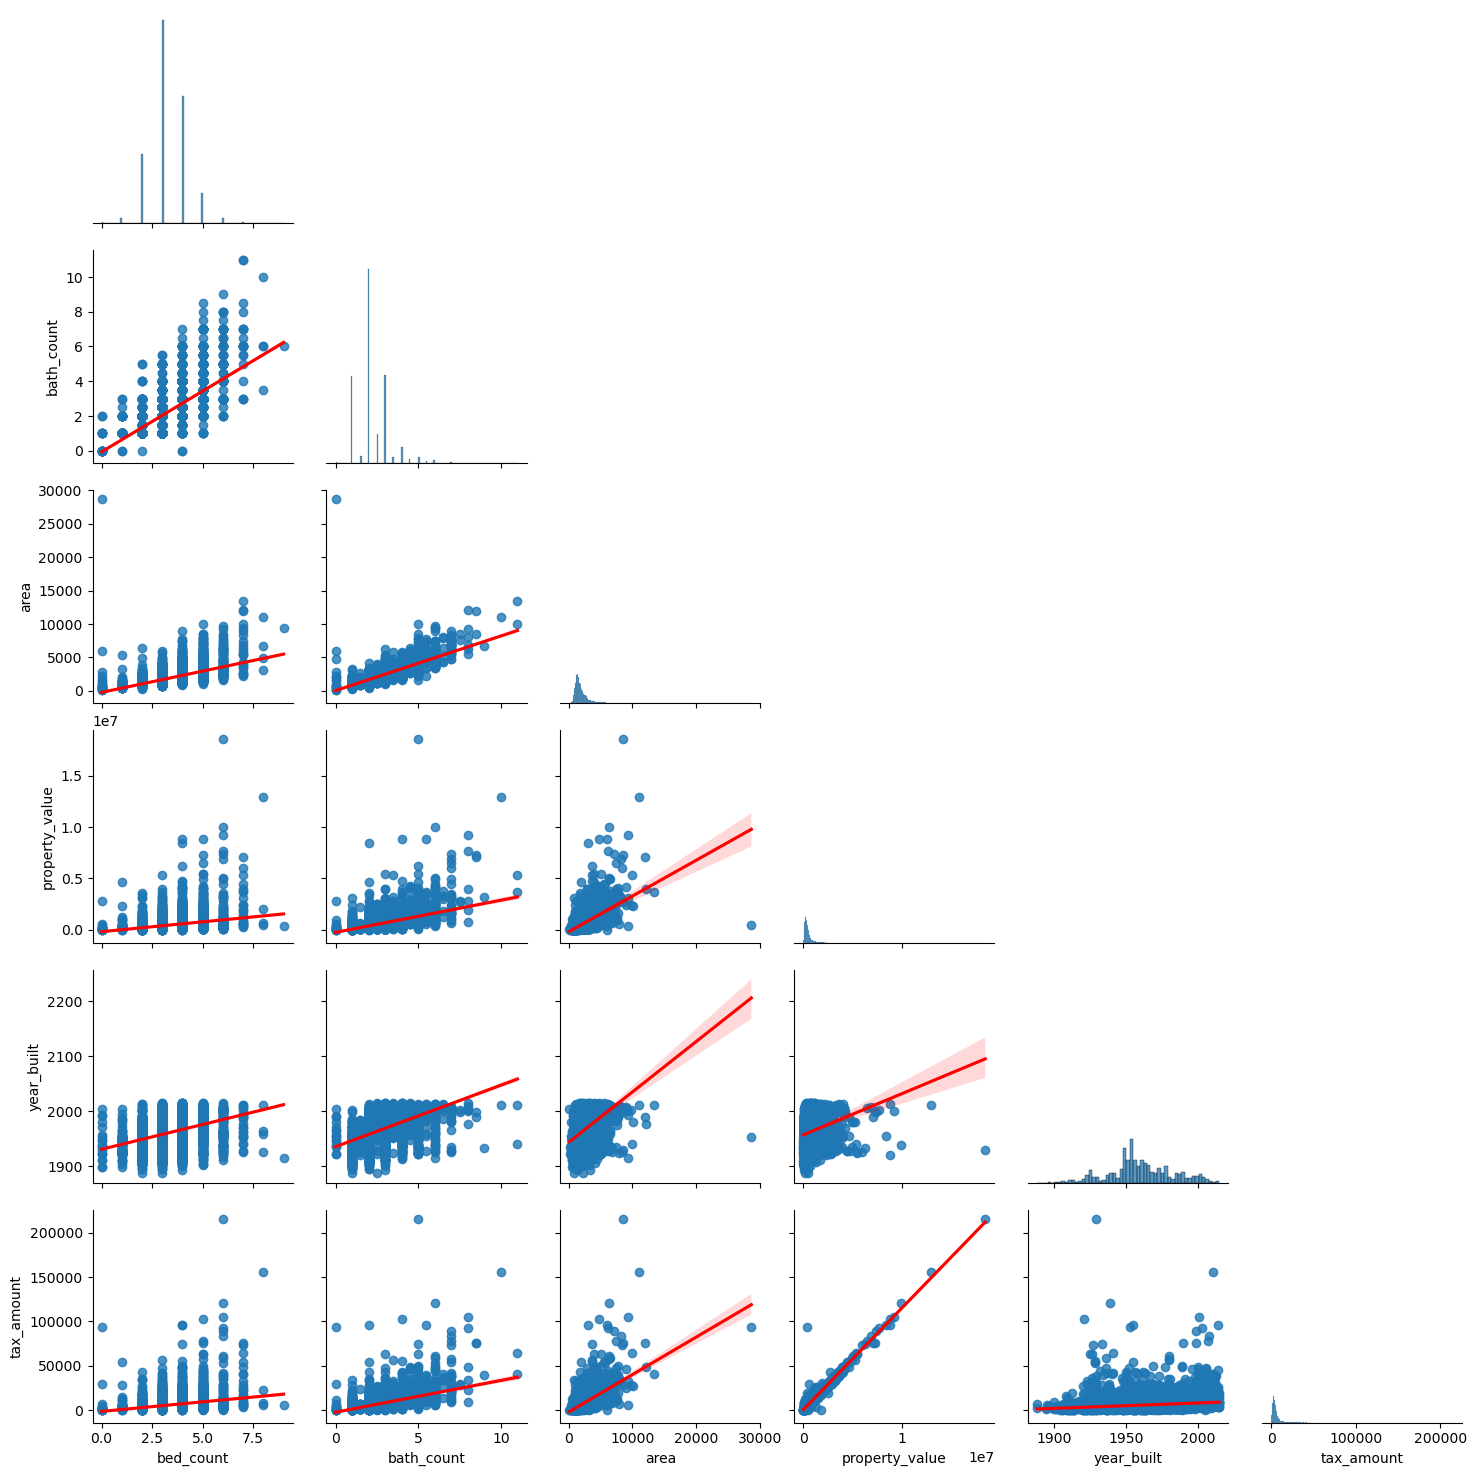

In [17]:
e.plot_variable_pairs(train)

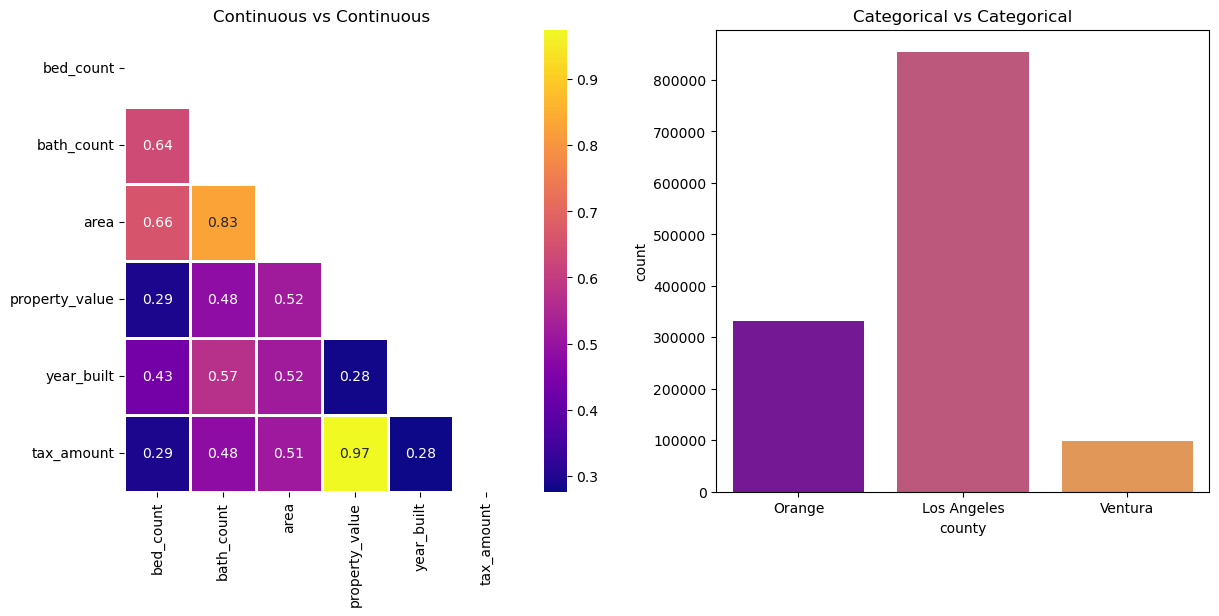

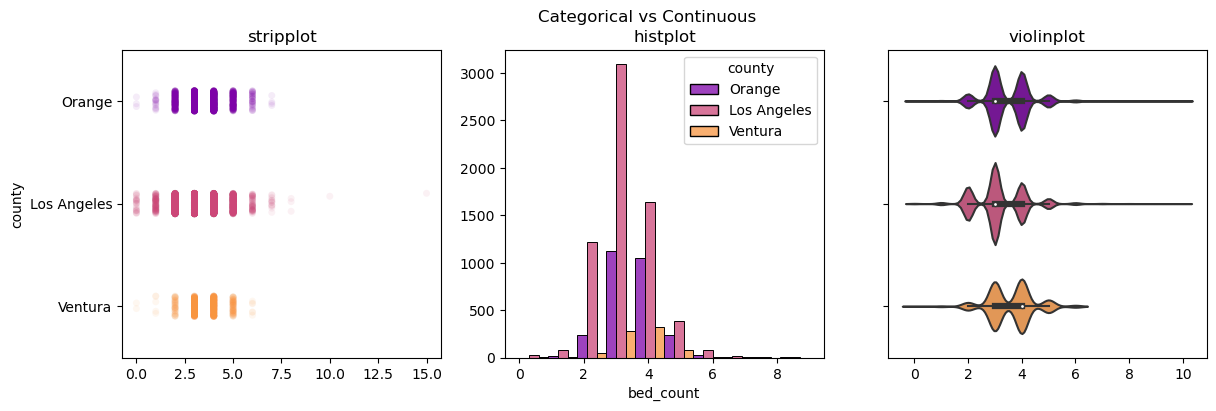

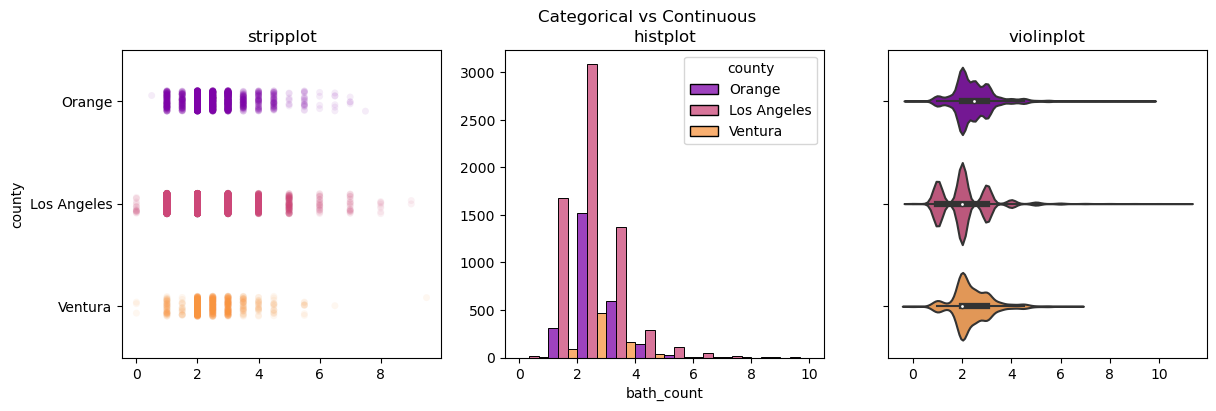

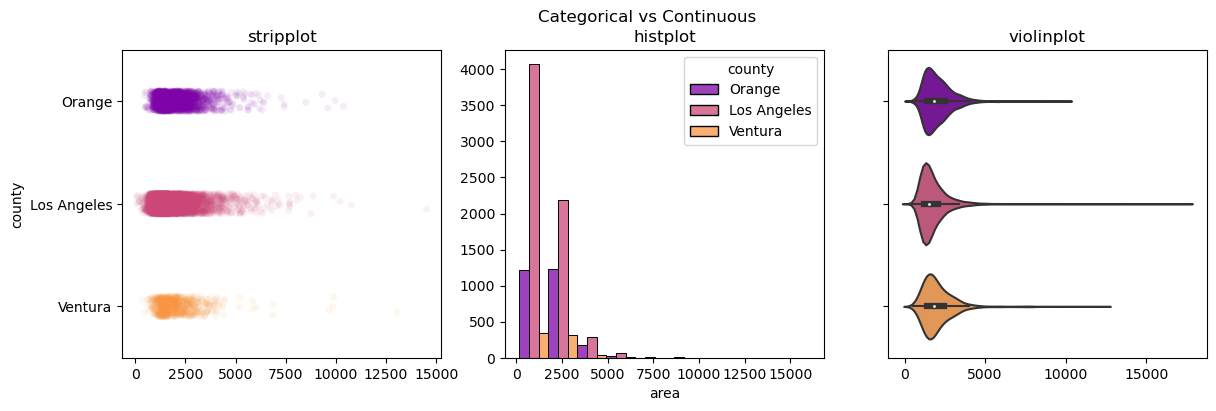

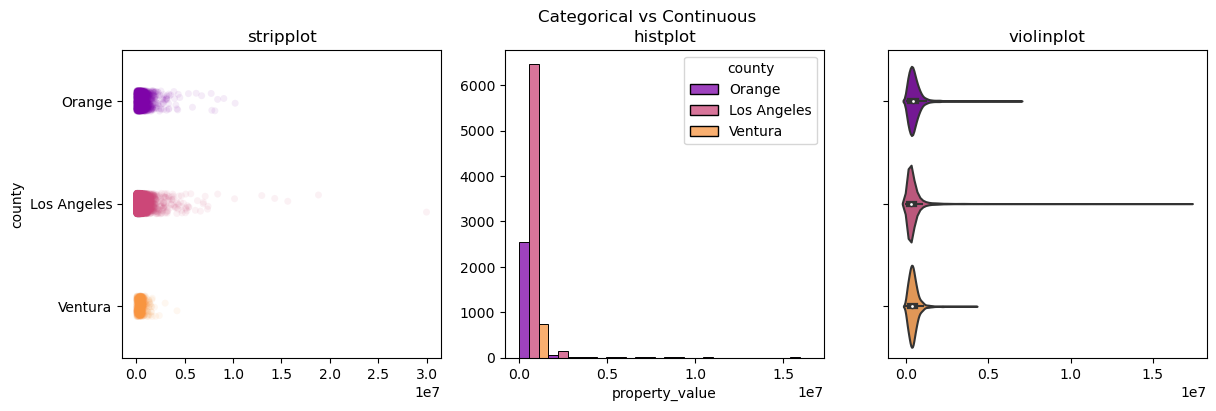

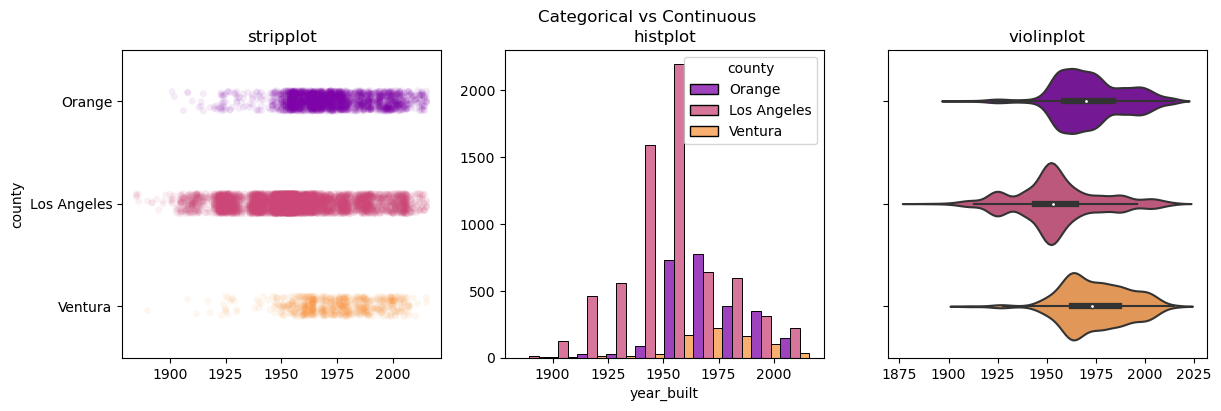

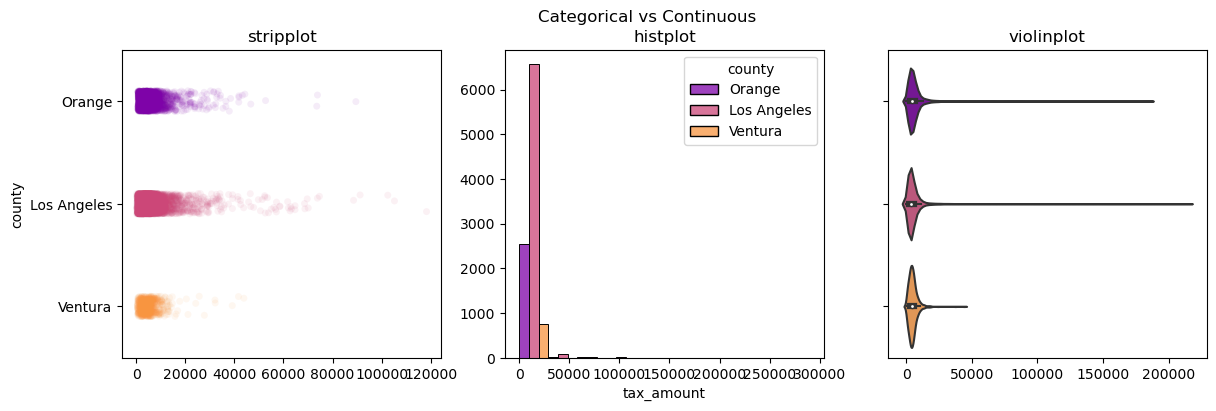

In [18]:
e.plot_categorical_and_continuous_vars(train,cat_columns,cont_columns)

## 4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

## 5. Come up with some initial hypotheses based on your goal of predicting property value.

## 6. Visualize all combinations of variables in some way.

## 7. Run the appropriate statistical tests where needed.

## 8. What independent variables are correlated with the dependent variable, home value?

## 9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 10. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 11. Explore your dataset with any other visualizations you think will be helpful.